In [1]:
import cv2
import numpy as np
import pandas as pd

IMAGE_SHAPE = (640, 480)
IMAGE_ARRAY_SIZE = IMAGE_SHAPE[0] * IMAGE_SHAPE[1]


PATH = '../data/MICC-F220'
dataset = pd.read_table('%s/groundtruthDB_220.txt' % PATH,
                        delim_whitespace=True,
                        header=None,
                        index_col=False,
                        names=['filename', 'tempered'])
dataset['tempered'] = dataset['tempered'].astype(np.bool)
dataset['image'] = pd.Series(dtype=np.ndarray)
# images = np.empty((len(dataset), 6144), dtype=np.ndarray) # 657920
images = []

## SIFT

In [2]:
index = 0
row = dataset.iloc[index]

file_path = '%s/%s' % (PATH, row['filename'])
# read_image(file_path).shape
img = cv2.imread(file_path)
img = cv2.resize(img, dsize=IMAGE_SHAPE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT()
keypoints, descriptors = sift.detectAndCompute(gray, None)
# print(len(keypoints), descriptors.shape)
# print(descriptors.reshape(-1).shape, IMAGE_ARRAY_SIZE)
# images.append(descriptors.reshape(-1))
# images

# img = cv2.drawKeypoints(gray,
#                         keypoints,
#                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imwrite('sift_keypoints2.jpg', img)

descriptors

array([[  7.,   3.,   1., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   4.,   9.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       ..., 
       [  6.,   2.,   4., ...,   0.,   0.,   5.],
       [ 59.,   5.,   0., ...,  12.,  15.,  24.],
       [ 14.,   0.,   0., ...,   3.,   5.,  53.]], dtype=float32)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# descriptors.shape
# sns.distplot(descriptors.reshape(-1))
# sns.pairplot(descriptors)
descriptors.shape

(4756, 128)

In [5]:
images = np.empty(0)
for index, row in dataset.iterrows():
    file_path = '%s/%s' % (PATH, row['filename'])
    img = cv2.imread(file_path)
    img = cv2.resize(img, dsize=IMAGE_SHAPE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT()
    # kp = sift.detect(gray, None)
    # img = cv2.drawKeypoints(gray,
    #                         kp,
    #                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # cv2.imwrite('sift_keypoints2.jpg',img)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    images = np.vstack((descriptors.reshape(-1), images))


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
images.shape

In [ ]:
max([len(img) for img in images])

In [6]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(images, dataset['tempered'].astype(np.int))

/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [7]:
images

array([], dtype=float64)

## SURF

In [8]:
descriptors[0].shape

(128,)

In [9]:
k = keypoints[0]
print(k.angle, k.octave, k.pt, k.response, k.size)
k = keypoints[1]
print(k.angle, k.octave, k.pt, k.response, k.size)

(211.8409423828125, 2294271, (396.13946533203125, 2.3305697441101074), 0.018525946885347366, 1.8540772199630737)
(58.28411865234375, 2294271, (396.13946533203125, 2.3305697441101074), 0.018525946885347366, 1.8540772199630737)


In [10]:
index = 0
row = dataset.iloc[index]

file_path = '%s/%s' % (PATH, row['filename'])
img = cv2.imread(file_path)
img = cv2.resize(img, dsize=IMAGE_SHAPE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
surf = cv2.SURF()
surf.hessianThreshold = 10000
keypoints, descriptors = surf.detectAndCompute(gray, None)
print(len(keypoints))

img = cv2.drawKeypoints(gray,
                        keypoints,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('../figures/surf_keypoints.jpg', img)

descriptors

288


array([[  2.61782366e-03,  -3.45662382e-04,   1.07271913e-02, ...,
         -3.39754485e-03,   1.10191870e-02,   4.24747774e-03],
       [ -9.98841692e-03,  -8.08567740e-04,   1.60991717e-02, ...,
         -5.01574250e-03,   5.59381582e-03,   5.53596346e-03],
       [  1.41778402e-03,  -1.67023286e-03,   1.44920917e-03, ...,
         -7.27302744e-04,   5.76480152e-03,   5.48241753e-03],
       ..., 
       [  1.02238811e-03,  -6.44639877e-05,   3.44316592e-03, ...,
         -7.98630354e-04,   1.14633539e-03,   7.11347349e-03],
       [  6.51169056e-03,  -4.20506764e-03,   6.79065101e-03, ...,
          1.05980129e-04,   9.88789182e-03,   2.35824031e-03],
       [  4.21930017e-05,  -6.95146271e-04,   6.94726070e-04, ...,
         -1.64073054e-03,   2.72595440e-03,   3.84417595e-03]], dtype=float32)

In [11]:
points = [kp.pt for kp in keypoints]
sns.pairplot(points[:2])

IndexError: index out of range

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


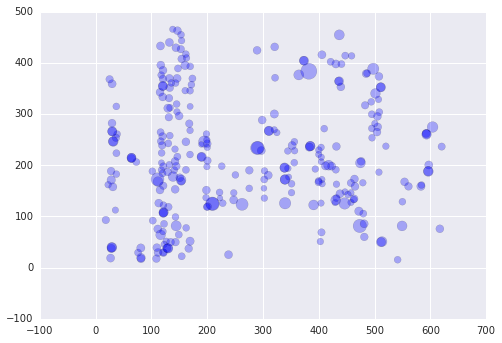

In [12]:
x = [p[0] for p in points]
y = [p[1] for p in points]
area = [p.size * 3 for p in keypoints]
plt.scatter(x, y, s=area, alpha=0.3)
plt.show()

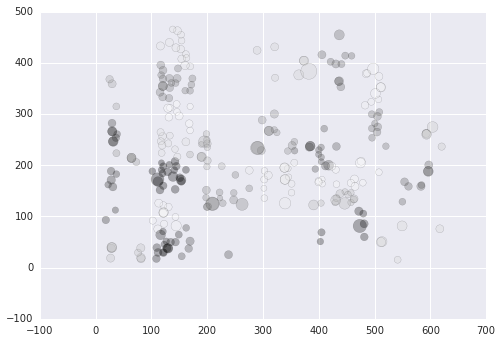

In [13]:
from sklearn.cluster import KMeans
import math

kmeans = KMeans(n_clusters=int(math.ceil(len(points) / 10)))
kmeans.fit(points)
colors = kmeans.predict(points)

plt.scatter(x, y,
            s=area,
            alpha=0.3,
            c=colors)
plt.show()